<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorios N°06

<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1iLbdUKIrQByZ_yJFKOonV2VK4UL1aMvA" width = "400" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [30]:
# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.

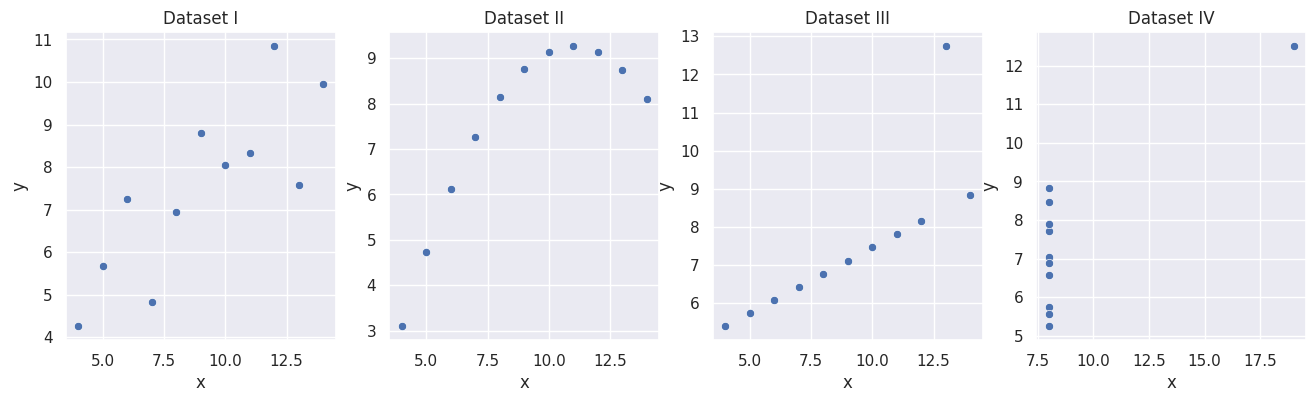

In [31]:
# Dividir los datos en cuatro conjuntos según el valor de "dataset"
ds1 = data[data['dataset'] == 'I']
ds2 = data[data['dataset'] == 'II']
ds3 = data[data['dataset'] == 'III']
ds4 = data[data['dataset'] == 'IV']

# Crear una figura con cuatro subplots
fig, axs = plt.subplots(ncols=4, figsize=(16, 4))

# Graficar cada conjunto de datos en su respectivo subplot
sns.scatterplot(x = 'x', y = 'y', data = ds1, ax = axs[0])
sns.scatterplot(x = 'x', y = 'y', data = ds2, ax = axs[1])
sns.scatterplot(x = 'x', y = 'y', data = ds3, ax = axs[2])
sns.scatterplot(x = 'x', y = 'y', data = ds4, ax = axs[3])

# Agregar títulos a los subplots
axs[0].set_title('Dataset I')
axs[1].set_title('Dataset II')
axs[2].set_title('Dataset III')
axs[3].set_title('Dataset IV')

# Mostrar el gráfico
plt.show()

**Observación:** Se puede ver a simple vista que los grupos son completameinte diferentes entre si.

2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando `describe` para cada grupo. Interprete.

In [32]:
from IPython.display import display_html

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
        html_str += '&nbsp;&nbsp;&nbsp;&nbsp;'
    display_html(
        html_str.replace('table','table style="display:inline"'),
        raw=True
    )

# Mostrar estadisticas para cada conjunto
print("Estadisticas Basicas:\n")
x=" "
print(f"{10*x}Dataset I {20*x}Dataset II" f"{20*x}Dataset III {20*x}Dataset IV")
display_side_by_side(ds1.describe(),ds2.describe(),ds3.describe(),ds4.describe())


Estadisticas Basicas:

          Dataset I                     Dataset II                    Dataset III                     Dataset IV


,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000
,x,y
count,11.000000,11.000000


3. Realice un ajuste lineal (con **sklearn**) y calcule los resultados de las métricas para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

In [45]:
#Para el Grupo 1
x1 = ds1[['x']]
y1 = ds1['y']
reg = LinearRegression().fit(x1, y1)
y1_hat = reg.predict(x1)

#Para el Grupo 2
x2 = ds2[['x']]
y2 = ds2['y']
reg = LinearRegression().fit(x2, y2)
y2_hat = reg.predict(x2)

#Para el Grupo 3
x3 = ds3[['x']]
y3 = ds3['y']
reg = LinearRegression().fit(x3, y3)
y3_hat = reg.predict(x3)

#Para el Grupo 4
x4 = ds4[['x']]
y4 = ds4['y']
reg = LinearRegression().fit(x4, y4)
y4_hat = reg.predict(x4)

In [46]:
#Definimos las metricas necesarias
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):

    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [49]:
#Calculamos las metricas para el Grupo 1
df_temp1 = pd.DataFrame(
    {
        'y':y1,
        'yhat': y1_hat
        }
)

print('\nMetricas para el Grupo 1:\n')
regression_metrics(df_temp1)


Metricas para el Grupo 1:



,mae,mse,rmse,mape,smape
0,0.8374,1.2512,1.1185,12.1258,0.2163


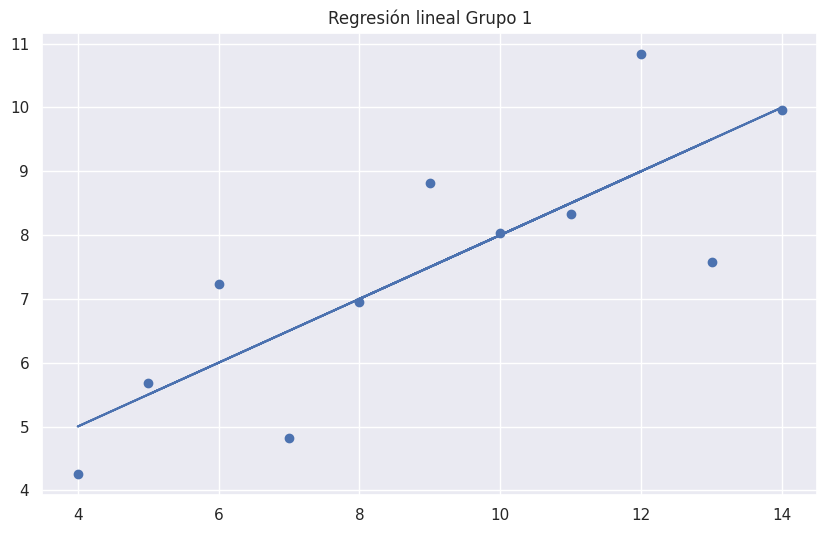

In [55]:
#Graficamos el Grupo 1
fig = plt.figure(figsize=(10, 6))

plt.scatter(x1, y1)
plt.plot(x1, y1_hat)
plt.title('Regresión lineal Grupo 1')
plt.show()

In [50]:
#Calculamos las metricas para el Grupo 2
df_temp2 = pd.DataFrame(
    {
        'y':y2,
        'yhat': y2_hat
        }
)

print('\nMetricas para el Grupo 2:\n')
regression_metrics(df_temp2)


Metricas para el Grupo 2:



,mae,mse,rmse,mape,smape
0,0.9679,1.2524,1.1191,15.6952,0.2713


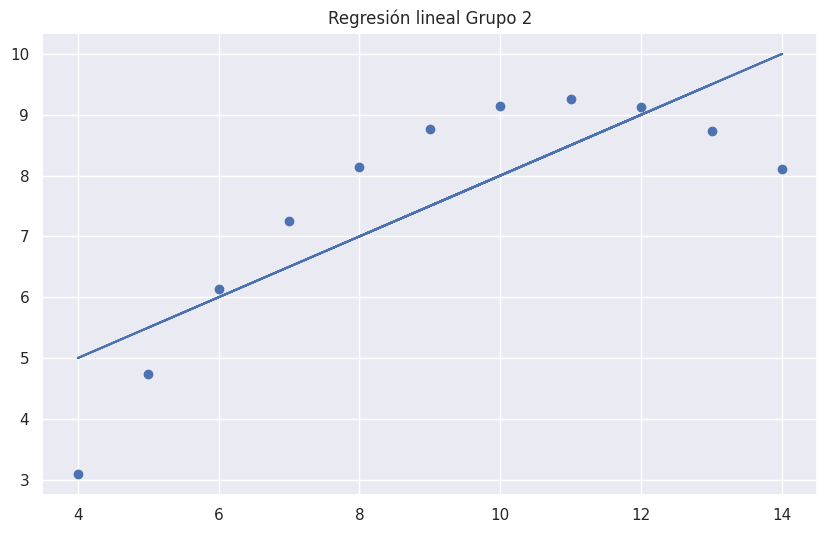

In [56]:
#Graficamos el Grupo 2
fig = plt.figure(figsize=(10, 6))

plt.scatter(x2, y2)
plt.plot(x2, y2_hat)
plt.title('Regresión lineal Grupo 2')
plt.show()

In [51]:
#Calculamos las metricas para el Grupo 3
df_temp3 = pd.DataFrame(
    {
        'y':y3,
        'yhat': y3_hat
        }
)

print('\nMetricas para el Grupo 3:\n')
regression_metrics(df_temp3)


Metricas para el Grupo 3:



,mae,mse,rmse,mape,smape
0,0.716,1.2506,1.1183,7.9707,0.1476


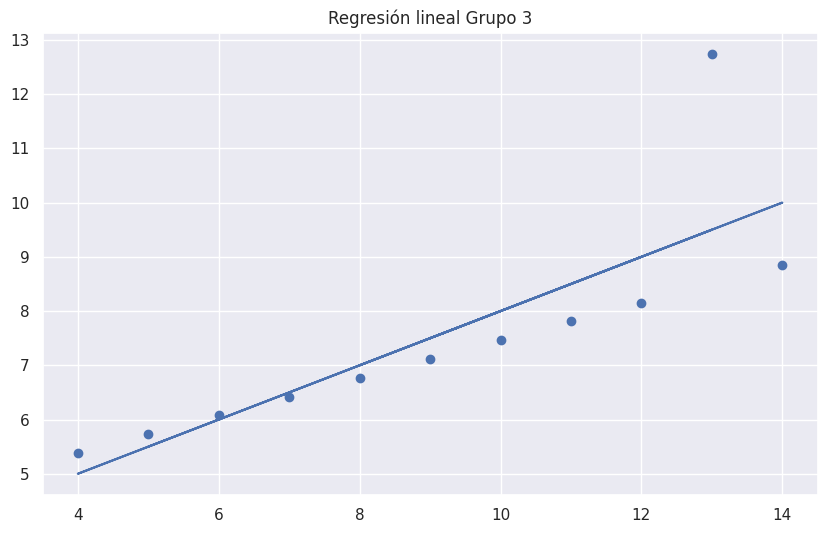

In [57]:
#Graficamos el Grupo 3
fig = plt.figure(figsize=(10, 6))

plt.scatter(x3, y3)
plt.plot(x3, y3_hat)
plt.title('Regresión lineal Grupo 3')
plt.show()

In [52]:
#Calculamos las metricas para el Grupo 4
df_temp4 = pd.DataFrame(
    {
        'y':y4,
        'yhat': y4_hat
        }
)

print('\nMetricas para el Grupo 4:\n')
regression_metrics(df_temp4)


Metricas para el Grupo 4:



,mae,mse,rmse,mape,smape
0,0.9027,1.2493,1.1177,13.4738,0.2375


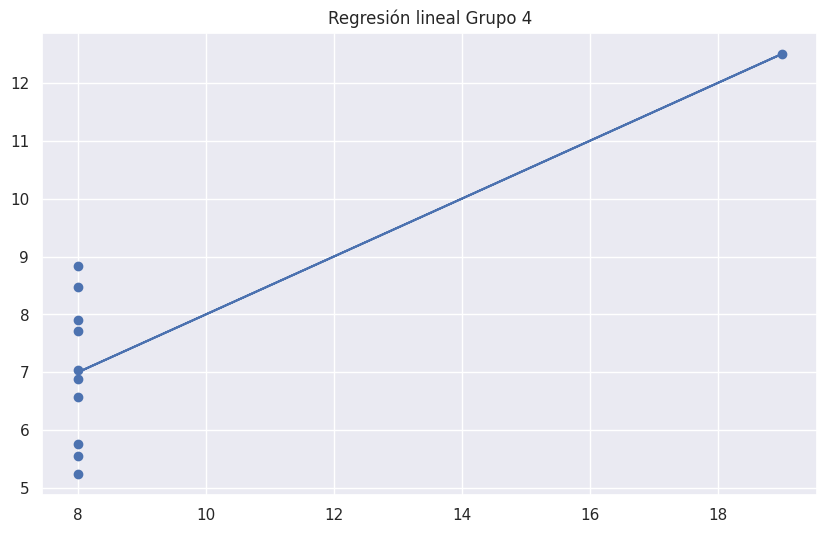

In [58]:
#Graficamos el Grupo 4
fig = plt.figure(figsize=(10, 6))

plt.scatter(x4, y4)
plt.plot(x4, y4_hat)
plt.title('Regresión lineal Grupo 4')
plt.show()

Mientras que metricas como MSE, RMSE y SMAPE tienen pequeña variación. MAE y MAPE varian en mayor cantidad.
Por otro lado, de los gráficos, podemos identificar que el primer grupo esta correctamente aplicado la regresión lineal. El segundo grupo es más bien un comportamiento cuadratico. Para el tercer grupo se observa un outlayer que altera la recta. Y finalmente para el cuarto grupo, tambien se ve un outlayer, que sin este, el comportamiento sería más bien constante x = 8, para todo 'y'.

4. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

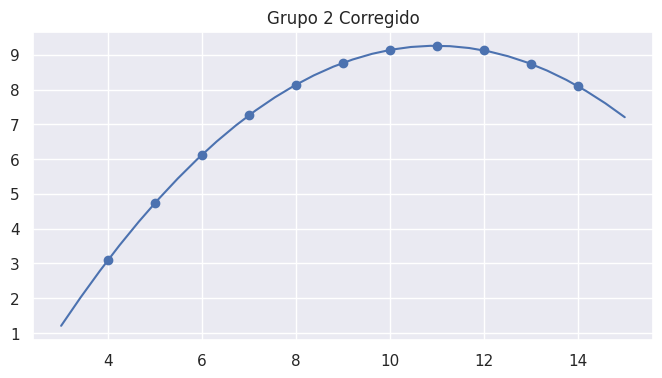

In [79]:
#Corrección Modelo 2

fig = plt.figure(figsize=(8, 4))


x = ds2['x']
y = ds2['y']
line = np.linspace(3,15,30)
polymodel = np.poly1d(np.polyfit(x, y, 2))


plt.scatter(x, y)
plt.plot(line, polymodel(line))
plt.title('Grupo 2 Corregido')
plt.show()

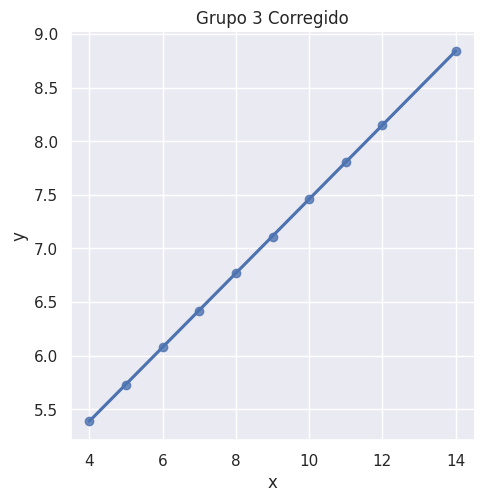

In [73]:
#Correción Modelo 3

New_ds3 = ds3.drop(24) #Quitamos el dato
New_x = ['x']
New_y = ['y']

sns.lmplot(x = 'x', y = 'y', data = New_ds3)
plt.title('Grupo 3 Corregido')
plt.show()

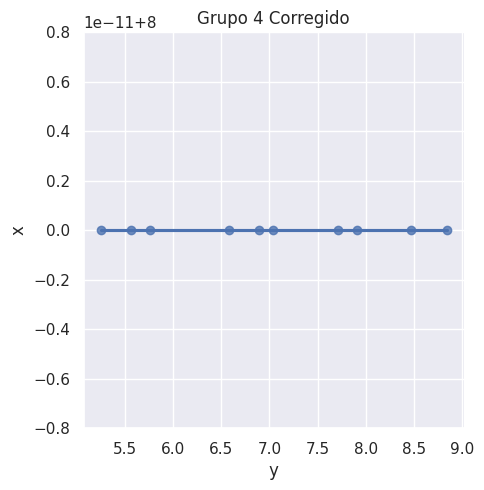

In [75]:
#Correción Modelo 4

New_ds4 = ds4.drop(40) #Quitamos el dato
New_x = ['x']
New_y = ['y']

sns.lmplot(x = 'y', y = 'x', data = New_ds4)
plt.title('Grupo 4 Corregido')
plt.show()